In [106]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

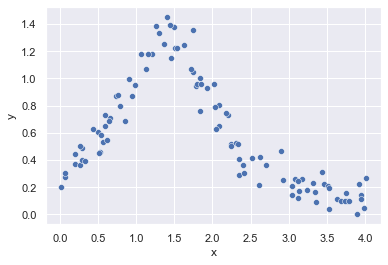

In [107]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()


In [108]:
#df["x"] >= 1.5
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

In [109]:
df_1 = sp.stats.linregress(df)
from sklearn.metrics import r2_score
pendiente = df_1.slope*-1
r2 = (r2_score(X, Y) +1) *-1


print("Pendiente: ", pendiente)
print("Intercepto con el eje y: ",df_1.intercept)
print("R^2: ", r2) 


Pendiente:  0.17520934629731408
Intercepto con el eje y:  0.9310818318359749
R^2:  0.8171706568393202


## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores

ValueError: Expected 2D array, got 1D array instead:
array=[0.06585881 0.02093073 0.07031212 0.20616556 0.28657196 0.27096854
 0.19957703 0.29455413 0.26240308 0.33728572 0.4999516  0.56632758
 0.53351561 0.52050379 0.4341235  0.61297735 0.54045169 0.58791458
 0.65418762 0.59973738 0.64327662 0.79594304 0.74257997 0.76763688
 0.85442627 0.90891591 0.98562327 0.95099631 1.0602925  1.20330968
 1.1279353  1.1567111  1.26668196 1.36000017 1.29863443 1.50230164
 1.50562639 1.43988698 1.40932438 1.4547854  1.53861099 1.74303808
 1.63129763 1.74347099 1.71939745 1.83746583 1.78364346 1.79867609
 1.84289189 1.8483764  1.93387166 2.09125265 2.03820061 2.02359864
 2.0902738  2.0449949  2.20199813 2.17991666 2.24415757 2.35430162
 2.3127741  2.24683712 2.32894996 2.34474379 2.39944378 2.41653076
 2.52228262 2.6262605  2.60474249 2.70034582 2.92385326 2.89756455
 3.04847795 3.08296186 3.03961595 3.11850711 3.16962498 3.12666503
 3.13513764 3.31078085 3.2422266  3.35073731 3.34782943 3.43266061
 3.45712348 3.50702511 3.5302859  3.63379892 3.53017745 3.68293872
 3.75957114 3.73331405 3.75135664 3.79104106 4.00656698 3.92261297
 3.89847332 3.95211126 3.93921079 3.98712003].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [ ]:
Y = df.loc[:, ['y']]

Y

In [55]:
X = df.loc[:, ['x']].rename(columns={'x': 'x1'})
X.insert(0, 'x0', 1)
X['x2'] = X['x1']*X['x1']

X

,x0,x1,x2
0,1,0.065859,0.004337
1,1,0.020931,0.000438
2,1,0.070312,0.004944
3,1,0.206166,0.042504
4,1,0.286572,0.082123
5,1,0.270969,0.073424
6,1,0.199577,0.039831
7,1,0.294554,0.086762
8,1,0.262403,0.068855
9,1,0.337286,0.113762


## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

# Tarea 4

Con base a los métodos vistos en clase resuelva las siguientes dos preguntas

## (A) Integrales

* $\int_{0}^{1}x^{-1/2}\,\text{d}x$
* $\int_{0}^{\infty}e^{-x}\ln{x}\,\text{d}x$
* $\int_{0}^{\infty}\frac{\sin{x}}{x}\,\text{d}x$

## (B) Fourier

Calcule la transformada rápida de Fourier para la función de la **Tarea 3 (D)** en el intervalo $[0,4]$ ($k$ máximo $2\pi n/L$ para $n=25$). Ajuste la transformada de Fourier para los datos de la **Tarea 3** usando el método de regresión exacto de la **Tarea 3 (C)** y compare con el anterior resultado. Para ambos ejercicios haga una interpolación y grafique para comparar.